In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC,SVR
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv('new_dataset2.csv')
data.head()

,Gender,Favorite food names,Expected food price of that favorite food,Month cost for that particular food,Favorite food in summer/winter/rainy season,Food flavor,Favourite food in rainy season
0,NaN,NaN,NaN,NaN,NaN,Sweet,NaN
1,Male,"Pasta, Pizza, Kacchi, Chinese, Traditional, Ri...",400,1000,Khacchi,Spicy,"Pasta, Pizza"
2,Male,Burger,200,600,Winter,Sweet,Mango
3,Female,Kacchi Biriyani,150 BDT,150 BDT,Kacchi Biriyani,Spicy,Khicuri with Hilsha Fry
4,Male,Kacci,200,400,NaN,Sweet,nothing special


In [32]:
data=data.drop(data.columns[[2,3,4,5,6]],axis=1)
data.head()

,Gender,Favorite food names
0,NaN,NaN
1,Male,"Pasta, Pizza, Kacchi, Chinese, Traditional, Ri..."
2,Male,Burger
3,Female,Kacchi Biriyani
4,Male,Kacci


In [33]:
data.rename(columns={'Favorite food names':'Favorite_food'}, 
                 inplace=True)
data.head()

,Gender,Favorite_food
0,NaN,NaN
1,Male,"Pasta, Pizza, Kacchi, Chinese, Traditional, Ri..."
2,Male,Burger
3,Female,Kacchi Biriyani
4,Male,Kacci


In [34]:
df=data
df['Favorite_food'] = df['Favorite_food'].str.capitalize()
df

,Gender,Favorite_food
0,NaN,NaN
1,Male,"Pasta, pizza, kacchi, chinese, traditional, ri..."
2,Male,Burger
3,Female,Kacchi biriyani
4,Male,Kacci
5,Male,"Chinese, pizza, pasta, noodles, polao, roast"
6,Female,Chinese
7,Female,"Pizza, chines food, indian food, burger, pasta"
8,Female,"Icecream,pasta,chinese"
9,Female,"Pasta, pizza, kacchi, chinese"


In [36]:
#new_df=df.apply(lambda x: x.str.replace(',',' '))
df=df.stack().str.replace(',','_').unstack()
df


,Gender,Favorite_food
1,Male,Pasta_ pizza_ kacchi_ chinese_ traditional_ ri...
2,Male,Burger
3,Female,Kacchi biriyani
4,Male,Kacci
5,Male,Chinese_ pizza_ pasta_ noodles_ polao_ roast
6,Female,Chinese
7,Female,Pizza_ chines food_ indian food_ burger_ pasta
8,Female,Icecream_pasta_chinese
9,Female,Pasta_ pizza_ kacchi_ chinese
10,Male,Burger_ pizza_ kacchi biriyani


In [38]:
#new_df=df.apply(lambda x: x.str.replace(',',' '))
df=df.stack().str.replace(' ','').unstack()
df
df.to_csv('abc.csv')

In [154]:
df['Favorite_food']=df['Favorite_food'].replace({'French fries': 'Italian', 'Shawrma': 'Italian',
                                                 'Biriani':'Traditional', 'Kachchi biriyani':'Traditional',
                                                 'Fried rice':'Chinese','Coffee':'Dessert','Grill-nun':'Indian'})
new_df=df.to_csv('preprocessesGenderFood.csv')

In [3]:
df=pd.read_csv('preprocessed2.csv')
df

,Gender,Favorite_food
0,NaN,NaN
1,Male,Pasta_pizza_kacchi_chinese_traditional_ricebowl
2,Male,Italian
3,Female,Traditional
4,Male,Traditional
5,Male,Chinese_pizza_pasta_noodles_polao_roast
6,Female,Chinese
7,Female,Pizza_chinesfood_indianfood_burger_pasta
8,Female,Icecream_pasta_chinese
9,Female,Pasta_pizza_kacchi_chinese


In [244]:
df['Favorite_food']=df['Favorite_food'].replace({'Nun-grill_chickenfry': 'Chinese','Kacchi_burger':'Italian',
                                                 'Hilsha_shrimps':'Traditional'})

In [245]:
df['Favorite_food'].unique()

array([nan, 'Traditional', 'Italian', 'Chinese', 'Indian', 'Dessert'],
      dtype=object)

In [246]:
df.to_csv('preprocessed_final.csv')

In [7]:
df=pd.read_csv('preprocessed_final.csv')
df.head()

,Gender,Favorite_food
0,NaN,NaN
1,Male,Traditional
2,Male,Italian
3,Female,Traditional
4,Male,Traditional


In [8]:
#df = df.fillna(method='bfill')
df.dropna(inplace=True)
df.head()
df.to_csv('final.csv')

In [100]:
df=pd.read_csv('final.csv')
df.head()

,Gender,Favorite_food
0,Male,Traditional
1,Male,Italian
2,Female,Traditional
3,Male,Traditional
4,Male,Italian


In [11]:
df['Gender'].replace({
    'Male': 0,
    'Female': 1
}, inplace = True)

In [12]:
df.head()

,Gender,Favorite_food
0,0,Traditional
1,0,Italian
2,1,Traditional
3,0,Traditional
4,0,Italian


In [103]:
df['Favorite_food'].unique()

array(['Traditional', 'Italian', 'Chinese', 'Indian', 'Dessert'],
      dtype=object)

In [104]:
df['Favorite_food'].replace({
    'Traditional' : 0,
    'Italian': 1,
    'Chinese': 2,
    'Indian' : 3,
    'Dessert' : 4
    }, inplace = True)

In [108]:
df.head()
df.to_csv('boxcat.csv')

In [16]:
D = df.values
X = D[:,:-1]
y = D[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.22)

In [17]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train.astype(int), Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
yPred=clf.predict(X_test.astype(int))
acc=accuracy_score(Y_test.astype(int), yPred.astype(int))
print('Accuracy with 3 neighbours: ',acc)

Accuracy with 3 neighbours:  0.43478260869565216


In [19]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
Y_pred = mnb.predict(X_test)
accMNB = accuracy_score(Y_test.astype(int), Y_pred.astype(int))
print('Accuracy: ',accMNB)

Accuracy:  0.34782608695652173


In [20]:
import operator
print('Predicted : '+ repr(Y_pred) + 'Actual: ' + repr(Y_test))

Predicted : array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)Actual: array([2, 0, 1, 3, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 4, 0,
       0], dtype=int64)


In [21]:
clfSVM = SVR(gamma='auto', C=1.0, epsilon=0.2)
clfSVM.fit(X_train,Y_train)
Y_predS = mnb.predict(X_test)
accSVM = accuracy_score(Y_test, Y_predS)
print('Accuracy: ',accSVM)

Accuracy:  0.34782608695652173


In [22]:
clfSVC = SVC(kernel = 'rbf')
clfSVC.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred = clfSVC.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.43478260869565216


In [24]:
confusion_matrix(Y_test,y_pred)

array([[7, 1, 0, 0, 0],
       [6, 3, 0, 0, 0],
       [2, 2, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

C:\Users\SudiptaaRumu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


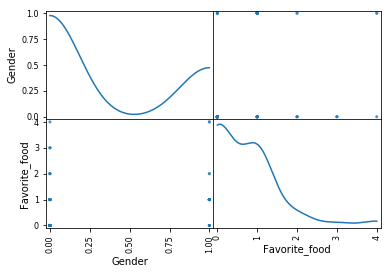

In [25]:
pd.scatter_matrix(df, diagonal='kde')
plt.show()

In [27]:
data = pd.DataFrame(df, columns = ['Gender' ,'Favorite_food'] ) 
  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A09A106898>,
      dtype=object)

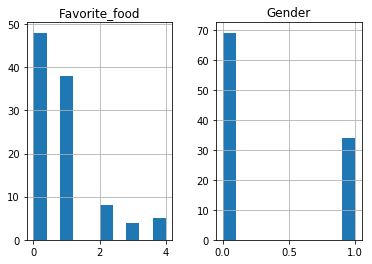

In [28]:
data.hist()

In [88]:
df=pd.read_csv('final.csv')
df.head()

,Gender,Favorite_food
0,Male,Traditional
1,Male,Italian
2,Female,Traditional
3,Male,Traditional
4,Male,Italian


In [102]:
df['Gender'].replace({
    'Male': 0,
    'Female': 1
}, inplace = True)

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cv = CountVectorizer()
#cv= TfidfTransformer()
sample= cv.fit_transform(df.Favorite_food)

In [44]:
print(cv.get_feature_names())

['chinese', 'dessert', 'indian', 'italian', 'traditional']


In [47]:
#X = vec.fit_transform(sample)
# print(X.toarray())
feature_extraction = pd.DataFrame(sample.toarray(), columns=cv.get_feature_names())
print(feature_extraction)

     chinese  dessert  indian  italian  traditional
0          0        0       0        0            1
1          0        0       0        1            0
2          0        0       0        0            1
3          0        0       0        0            1
4          0        0       0        1            0
5          1        0       0        0            0
6          0        0       0        1            0
7          0        0       0        1            0
8          0        0       0        1            0
9          0        0       0        0            1
10         0        0       0        0            1
11         0        0       0        1            0
12         0        0       0        0            1
13         1        0       0        0            0
14         0        0       0        0            1
15         0        0       1        0            0
16         0        0       0        0            1
17         0        0       0        0            1
18         0

In [62]:
vec= CountVectorizer()

In [63]:
D = df.values
X = D[:,:-1]
Y = D[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22)

In [64]:
df.head()

,Gender,Favorite_food
0,0,Traditional
1,0,Italian
2,1,Traditional
3,0,Traditional
4,0,Italian


In [65]:
Y_traincv=vec.fit_transform(Y_train)

In [66]:
feature_extraction = pd.DataFrame(Y_traincv.toarray(), columns=vec.get_feature_names())
print(feature_extraction)

    chinese  dessert  indian  italian  traditional
0         0        0       0        1            0
1         0        0       0        0            1
2         0        0       0        0            1
3         0        0       1        0            0
4         0        0       0        0            1
5         0        0       0        1            0
6         0        1       0        0            0
7         0        0       0        0            1
8         0        0       0        1            0
9         0        0       1        0            0
10        0        1       0        0            0
11        1        0       0        0            0
12        0        0       0        0            1
13        0        0       0        0            1
14        0        0       0        1            0
15        0        0       0        0            1
16        0        0       0        0            1
17        0        1       0        0            0
18        0        0       0   

In [69]:
array=Y_traincv.toarray()

In [71]:
vec.inverse_transform(array[2])

[array(['traditional'], dtype='<U11')]

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
Y_pred = mnb.predict(X_test)
accMNB = accuracy_score(Y_test.astype(int), Y_pred.astype(int))
print('Accuracy: ',accMNB)

In [72]:
mnb = MultinomialNB()

In [73]:
X_train=X_train.astype(int)

In [74]:
mnb.fit(Y_traincv,X_train)

C:\Users\SudiptaaRumu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
Y_testcv=vec.transform(Y_test)

In [77]:
pred=mnb.predict(Y_testcv)
pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

In [82]:
actual=np.array(X_test)
actual

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=object)

In [83]:
count=0
for i in range(len(pred)):
    if pred[i]==actual[i]:
        count=count+1;

In [84]:
count

19

In [85]:
len(pred)

23

In [86]:
19/23

0.8260869565217391

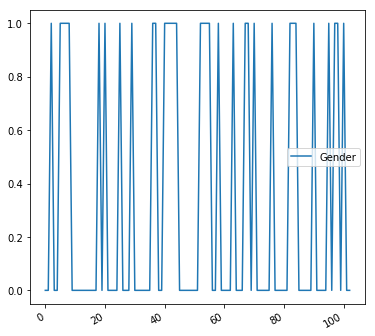

In [87]:
df.plot(subplots=True, figsize=(6, 6));

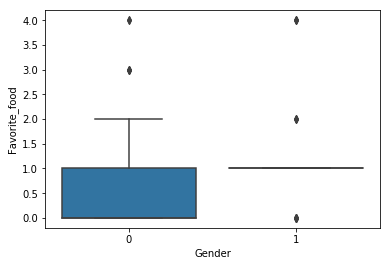

In [109]:
sns.boxplot(x='Gender', y='Favorite_food', data=df)

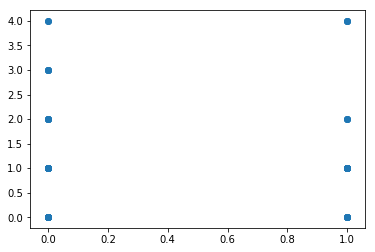

In [111]:
x=df['Gender']
y=df['Favorite_food']
plt.scatter(x,y)

In [112]:
X_test

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=object)

In [113]:
y_predict

NameError: name 'y_predict' is not defined

In [114]:
pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

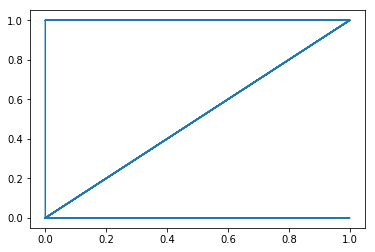

In [116]:
plt.plot(X_test,pred)

In [117]:
df.head()

,Gender,Favorite_food
0,0,0
1,0,1
2,1,0
3,0,0
4,0,1


In [118]:
df.corr()

,Gender,Favorite_food
Gender,1.000000,0.227681
Favorite_food,0.227681,1.000000


In [120]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['Gender', 'Favorite_food'])
df.plot.bar()

AttributeError: module 'numpy' has no attribute 'df'

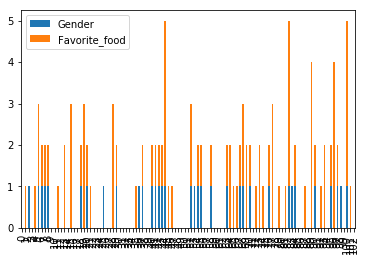

In [123]:
df.plot.bar(stacked=True);


In [124]:
df.head()

,Gender,Favorite_food
0,0,0
1,0,1
2,1,0
3,0,0
4,0,1


<Figure size 432x288 with 0 Axes>

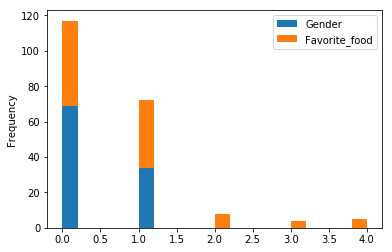

In [125]:
plt.figure();

df.plot.hist(stacked=True, bins=20)

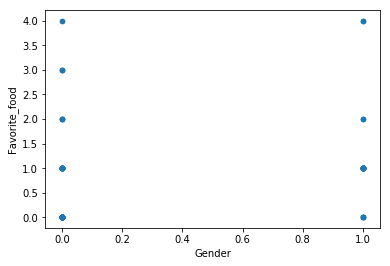

In [126]:
df.plot.scatter(x='Gender', y='Favorite_food');

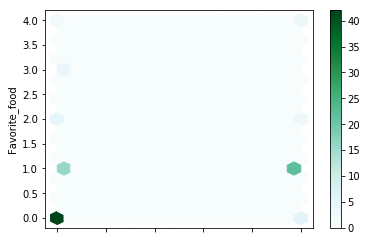

In [130]:
df.plot.hexbin(x='Gender', y='Favorite_food', gridsize=18)

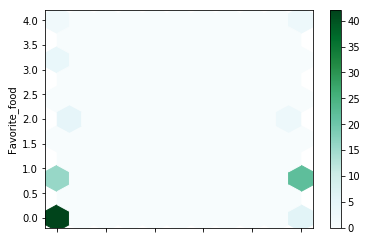

In [129]:
df.plot.hexbin(x='Gender', y='Favorite_food', reduce_C_function=np.max, gridsize=10)